In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Admission_Predict.csv')

In [3]:
df.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [5]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [6]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df['Research'].value_counts()

,count
Research,
1,219
0,181


In [8]:
from sklearn.model_selection import train_test_split
features=df.drop('Chance of Admit ',axis=1)
target=df['Chance of Admit ']
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=1)

In [9]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain_s=ss.fit_transform(xtrain)
xtest_s=ss.transform(xtest)

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=7))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='tanh'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232 (928.00 B)

 Trainable params: 232 (928.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='mse',optimizer='Adam',metrics=['mse'])

In [14]:
history=model.fit(xtrain_s,ytrain,batch_size=10,epochs=10,verbose=1, validation_split=0.2)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.5867 - mse: 0.5867 - val_loss: 0.3191 - val_mse: 0.3191
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2880 - mse: 0.2880 - val_loss: 0.1878 - val_mse: 0.1878
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1558 - mse: 0.1558 - val_loss: 0.1146 - val_mse: 0.1146
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1071 - mse: 0.1071 - val_loss: 0.0681 - val_mse: 0.0681
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0702 - mse: 0.0702 - val_loss: 0.0424 - val_mse: 0.0424
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0433 - mse: 0.0433 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0329 - mse: 0.0329 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 - ms

In [15]:
ypred=model.predict(xtest_s)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [16]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, ypred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.10536666886508464


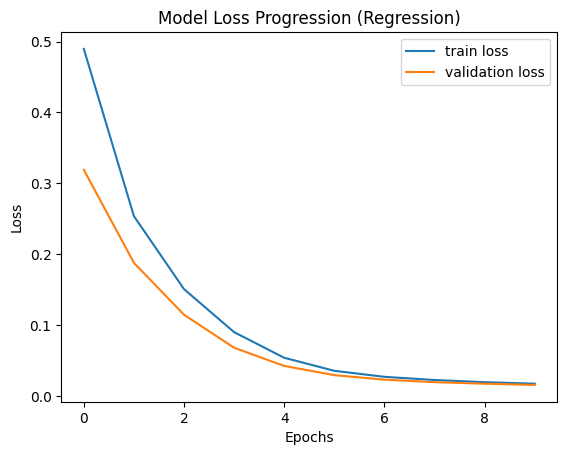

In [17]:
import matplotlib.pyplot as plt

# Assuming you have a model history object after training, e.g.:
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Plot training & validation loss for a regression problem
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')

# Adding titles and labels for clarity
plt.title('Model Loss Progression (Regression)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()
